In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.visualization import print_fold_iteration_score, plot_confusion_matrix, history_plot_adv
from utils.utility import dehot_batch

labels_classes = ["STE", "N", "AF", "I-AVB", "LBB", "RBB", "PAC", "PVC", "STD"]

In [9]:
""" 
(1) Atrial fibrillation (AF)
(2) First-degree atrioventricular block (I-AVB)
(3) Left bundle brunch block (LBBB)
(4) Right bundle brunch block (RBBB)
(5) Premature atrial contraction (PAC)
(6) Premature ventricular contraction (PVC)
(7) ST-segment depression (STD)
(8) ST-segment elevated (STE)

1 : 918
2 : 1148
3 : 702
4 : 232
5 : 1533
6 : 601
7 : 689
8 : 834
9 : 220

0 -> 22  -> STE
1 -> 91  -> NORMAL
2 -> 114 -> AF
3 -> 70  -> I-AVB
4 -> 23  -> LBB
5 -> 153 -> RBB
6 -> 60  -> PAC
7 -> 68  -> PVC
8 -> 83  -> STD
"""

labels_classes = ["STE", "N", "AF", "I-AVB", "LBB", "RBB", "PAC", "PVC", "STD"]

In [80]:
from pathlib import Path
import pprint

def extract_fold_scores(base_dir="ablation_study/evaluate_res/", score_folder_name = "my_thesis_scores"):
    result = {}

    experiments = os.listdir(base_dir)
    for ex in experiments:
        x = os.listdir(Path(base_dir).joinpath(ex))
        ris = {}
        for xx in x:
            y = os.listdir(Path(base_dir).joinpath(ex).joinpath(xx).joinpath(score_folder_name))
            loc = []
            for yy in y:
                score_path = Path(base_dir).joinpath(ex).joinpath(xx).joinpath(score_folder_name).joinpath(yy)
                print(score_path)
                with open(f"{score_path}", 'rb') as fp:
                    fold_score = pickle.load(fp)
                    loc.append(fold_score)
            ris[xx]= loc
        result[ex]=ris
    return result


result = extract_fold_scores()
print(len(result))
pprint.pprint(result)



ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold0_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold1_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold2_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold3_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold4_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold5_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold6_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold7_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)\my_thesis_scores\fold8_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)-(0,)-(1,)-(2,)-(3,)-(4,)-(5,)-(6,)-(7,)-(8,)-(9,)-(10,)-(11,)\my_thesis_scores\fold0_score.pickle
ablation_study\evaluate_res\solo_lead\(12,)-(0,)-(1,)-(2,)-(3,)-(4,)-(5,)-(6,)-(7,)-(8,)-(9,)-(10,)-(11,)\my_thesis_scores\fold1_score.pic

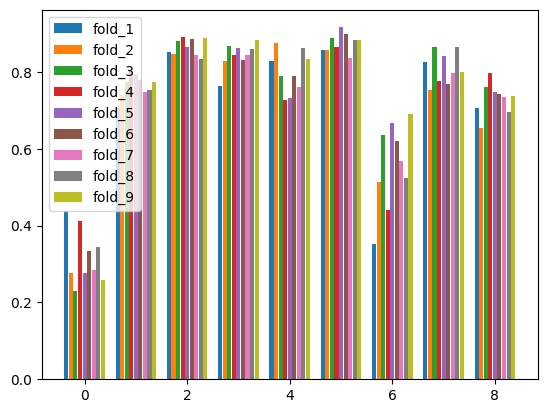

In [81]:

labels_classes = ["STE", "N", "AF", "I-AVB", "LBB", "RBB", "PAC", "PVC", "STD"]
base_path = "./ablation_study/evaluate_res/solo_lead/(12,)/my_thesis_scores/"
scores = os.listdir(base_path)
fold_scores = []
for file_path in scores:
    with open(f"{base_path}/{file_path}", 'rb') as fp:
        fold_score = pickle.load(fp)
        fold_scores.append([f["F1"] for f in fold_score])


vbar_data = {}

for id, f in enumerate(fold_scores):
    vbar_data[f"fold_{id+1}"] = f



def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    n_bars = len(data)

    bar_width = total_width / n_bars

    bars = []

    for i, (name, values) in enumerate(data.items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
        bars.append(bar[0])

    if legend:
        ax.legend(bars, data.keys())
        

fig, ax = plt.subplots()
bar_plot(ax, vbar_data, total_width=.8, single_width=.9)
plt.show()

[[0.4375, 0.7069767441860465, 0.8521739130434782, 0.7647058823529411, 0.8292682926829268, 0.8571428571428571, 0.35294117647058826, 0.8260869565217391, 0.7052631578947368], [0.27586206896551724, 0.7403846153846154, 0.8482142857142857, 0.8285714285714286, 0.875, 0.8580246913580247, 0.5148514851485149, 0.7536231884057971, 0.6538461538461539], [0.23076923076923078, 0.7741935483870968, 0.8820960698689956, 0.8676470588235294, 0.7906976744186046, 0.8895705521472392, 0.6355140186915887, 0.8656716417910447, 0.76], [0.4117647058823529, 0.803921568627451, 0.8907563025210085, 0.8444444444444444, 0.7272727272727273, 0.864516129032258, 0.43956043956043955, 0.7761194029850746, 0.797752808988764], [0.27586206896551724, 0.7959183673469388, 0.8646288209606987, 0.863013698630137, 0.7317073170731707, 0.9166666666666666, 0.6666666666666666, 0.8421052631578947, 0.7485380116959064], [0.3333333333333333, 0.7788461538461539, 0.8870292887029289, 0.8307692307692308, 0.7906976744186046, 0.8987341772151899, 0.6194

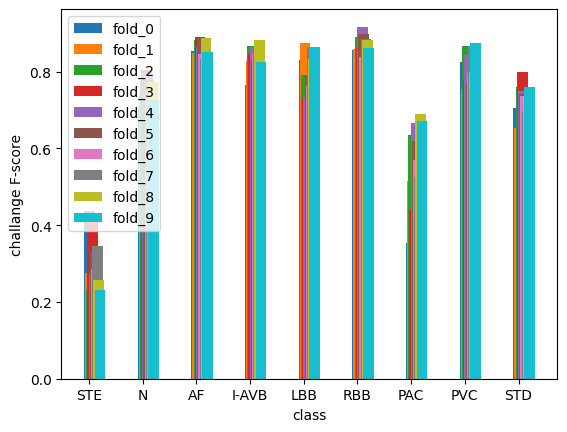

In [42]:
labels_classes = ["STE", "N", "AF", "I-AVB", "LBB", "RBB", "PAC", "PVC", "STD"]

base_path = "./ablation_study/evaluate_res/solo_lead/(12,)/my_thesis_scores/"
scores = os.listdir(base_path)

fold_scores = []

for file_path in scores:
    with open(f"{base_path}/{file_path}", 'rb') as fp:
        fold_score = pickle.load(fp)
        fold_scores.append([f["F1"] for f in fold_score])

print(fold_scores)

vbar_data = []

for id, f in enumerate(fold_scores):
    vbar_data.append((f, f'fold {id+1}'))
     
VBARplot(labels_classes, *vbar_data)
        

FOLD SCORES

final_score = [0.3084467  0.75995256 0.86433306 0.84143816 0.80671545 0.8749958
 0.5685742  0.8169801  0.73381661]
final_score_2 = [0.14632107 0.76647312 0.8872899  0.87821888 0.86143505 0.8689674
 0.748339   0.83707943 0.76398996]


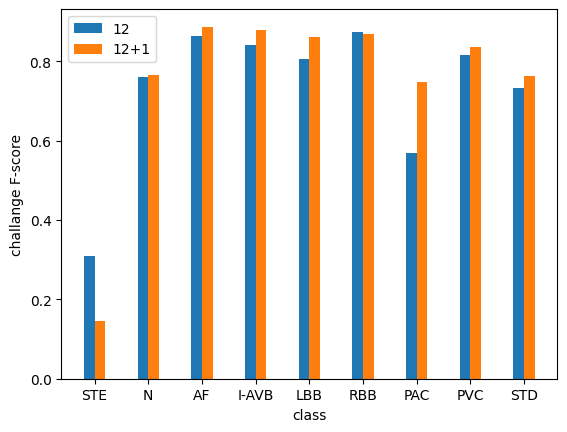

In [3]:

base_path = "./ablation_study/evaluate_res/solo_lead/(12,)/my_thesis_scores/"
scores = os.listdir(base_path)

fold_scores = []

for file_path in scores:
    with open(f"{base_path}/{file_path}", 'rb') as fp:
        fold_score = pickle.load(fp)
        fold_scores.append(fold_score)
        # print_fold_iteration_score(fold_score)

final_score = np.zeros((9,))
for f in fold_scores:
    for i in range(len(f)): 
        final_score[i] += f[i]["F1"]

final_score /= len(scores)

base_path = "./ablation_study/evaluate_res/solo_lead/(12,)-(0,)-(1,)-(2,)-(3,)-(4,)-(5,)-(6,)-(7,)-(8,)-(9,)-(10,)-(11,)/my_thesis_scores/"
scores = os.listdir(base_path)

fold_scores_2 = []
for file_path in scores:
    with open(f"{base_path}/{file_path}", 'rb') as fp:
        fold_score = pickle.load(fp)
        fold_scores_2.append(fold_score)
        # print_fold_iteration_score(fold_score)

final_score_2 = np.zeros((9,))
for f in fold_scores_2:
    for i in range(len(f)): 
        final_score_2[i] += f[i]["F1"]

final_score_2 /= len(scores)

n=9
r = np.arange(n)
width = 0.2

plt.xlabel("class")
plt.ylabel("challange F-score")
print(f'final_score = {final_score}')
print(f'final_score_2 = {final_score_2}')
plt.bar(r, final_score, width=width, label="12")
plt.bar(r + width, final_score_2, width=width, label="12+1")
plt.xticks(r + width/2, labels_classes)
plt.legend()
plt.show()

CONFUSION MATRIX

In [ ]:
base_path = "./ablation_study/evaluate_res/solo_lead/(12,)/"
prefixed = [filename for filename in os.listdir(base_path) if filename.endswith("preds.pickle")]

for file_path in prefixed:
    print(f'\n\n------{file_path}------\n\n')
    with open(f"{base_path}/{file_path}", 'rb') as fp:
        y_test, y_preds = pickle.load(fp)
        plot_confusion_matrix(dehot_batch(y_preds), dehot_batch(y_test), np.unique(dehot_batch(y_test)))
        

VAL LOSS HISTORY PLOT

In [ ]:
base_path = "./ablation_study/solo_lead/(12,)/"
dirs = os.listdir(base_path)

hs = []
legends = []

for dir in dirs:
    with open(f"{base_path}/{dir}/lead_combination_12/history", 'rb') as fp:
        history = pickle.load(fp)
        h = np.zeros((100,))
        h[:len(history["val_loss"])] = history["val_loss"]
        legends.append(dir)
        hs.append(h)

history_plot_adv(legends, *hs)

BOX PLOT

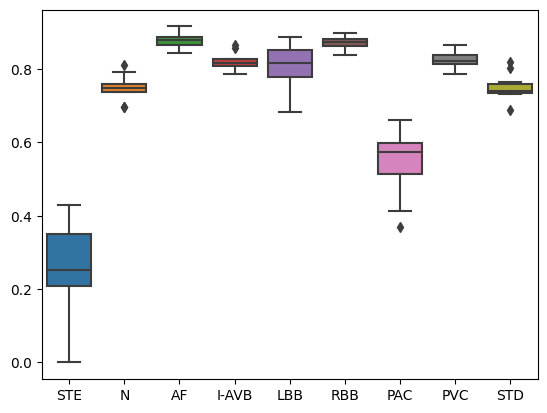

In [11]:
from collections import defaultdict
import matplotlib.pyplot as plt
from seaborn import boxplot

base_path = "./ablation_study/evaluate_res/solo_lead/(12,)/my_thesis_scores/"
scores = os.listdir(base_path)

class_f1 = defaultdict(list)

for file_path in scores:
    with open(f"{base_path}/{file_path}", 'rb') as fp:
        fold_score = pickle.load(fp)
        for i in range(len(fold_score)):
            class_f1[i].append(fold_score[i]["F1"])


boxplot_x = []
for k in list(class_f1.keys()):
    boxplot_x.append(class_f1[k])


boxplot(boxplot_x)
plt.xticks(range(len(labels_classes)), labels_classes)
plt.show()

CHALLANGE SCORE F1 BARS

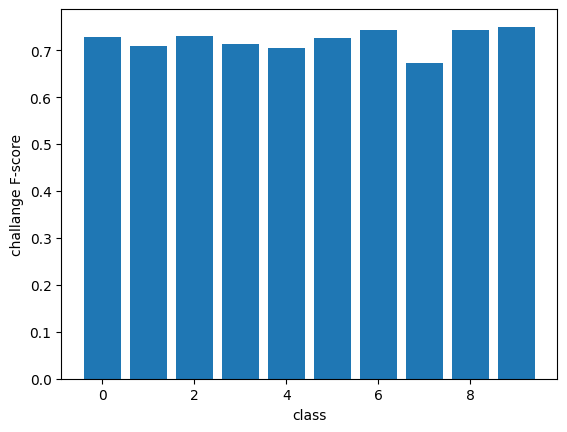

In [13]:

base_path = "./ablation_study/evaluate_res/solo_lead/(12,)/challenge_score/"
files = os.listdir(base_path)

scores = []

for file_path in files:
    with open(f"{base_path}/{file_path}", 'r') as fp:
        lines = fp.readlines()
        local_score = {}
        for line in lines:
            x = line.split(":")
            if len(x) == 2:
                local_score[x[0].replace(" ", "_")] = float(x[1])
        scores.append(local_score)

plt.xlabel("class")
plt.ylabel("challange F-score")
plt.bar(range(10), [s["F1"] for s in scores])
plt.show()